# Regression Model Validation

## Introduction

Previously you've evaluated a multiple linear regression model by calculating metrics based on the fit of the training data. In this lesson you'll learn why it's important to split your data in a train and a test set if you want to evaluate a model used for prediction.

## Objectives

You will be able to:

* Perform a train-test split
* Prepare training and testing data for modeling
* Compare training and testing errors to determine if model is over or underfitting

## Model Evaluation

Recall some ways that we can evaluate linear regression models.

### Residuals

It is pretty straightforward that, to evaluate the model, you'll want to compare your predicted values, $\hat y$ with the actual value, $y$. The difference between the two values is referred to as the **residuals**:

$r_{i} = y_{i} - \hat y_{i}$ 

To get a summarized measure over all the instances, a popular metric is the (Root) Mean Squared Error:

RMSE = $\sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2}$

MSE = $\frac{1}{n}\sum_{i=1}^{n}(y_{i} - \hat y_{i})^2$

Larger (R)MSE indicates a _worse_ model fit.

## The Need for Train-Test Split

### Making Predictions and Evaluation

So far we've simply been fitting models to data, and evaluated our models calculating the errors between our $\hat y$ and our actual targets $y$, while these targets $y$ contributed in fitting the model.

Let's say we want to predict the outcome for observations that are not necessarily in our dataset now; e.g: we want to **predict** miles per gallon for a new car that isn't part of our dataset, or predict the price for a new house in Ames.

In order to get a good sense of how well your model will be doing on new instances, you'll have to perform a so-called "train-test-split". What you'll be doing here, is taking a sample of the data that serves as input to "train" our model - fit a linear regression and compute the parameter estimates for our variables, and then calculate how well our predictive performance is doing based solely on the "test" data, comparing the actual targets $y$ and the fitted $\hat y$ obtained by our model.

### Underfitting and Overfitting

Another reason to use train-test-split is because of a common problem which doesn't only affect linear models, but nearly all (other) machine learning algorithms: overfitting and underfitting. An overfit model is not generalizable and will not hold to future cases. An underfit model does not make full use of the information available and produces weaker predictions than is feasible. The following image gives a nice, more general demonstration:

<img src='https://curriculum-content.s3.amazonaws.com/data-science/images/new_overfit_underfit.png'>

## Mechanics of Train-Test Split

When performing a train-test-split, it is important that the data is **randomly** split. At some point, you will encounter datasets that have certain characteristics that are only present in certain segments of the data. For example, if you were looking at sales data for a website, you might expect the data to look different on days that promotional deals were held versus days that deals were not held. If we don't randomly split the data, there is a chance we might overfit to the characteristics of certain segments of data.

Another thing to consider is just **how big** each training and testing set should be. There is no hard and fast rule for deciding the correct size, but the range of training set is usually anywhere from 66% - 80% (and testing set between 33% and 20%). Some types of machine learning models need a substantial amount of data to train on, and as such, the training sets should be larger. Some models with many different tuning parameters will need to be validated with larger sets (the test size should be larger) to determine what the optimal parameters should be. When in doubt, just stick with training set sizes around 70% and test set sizes around 30%.

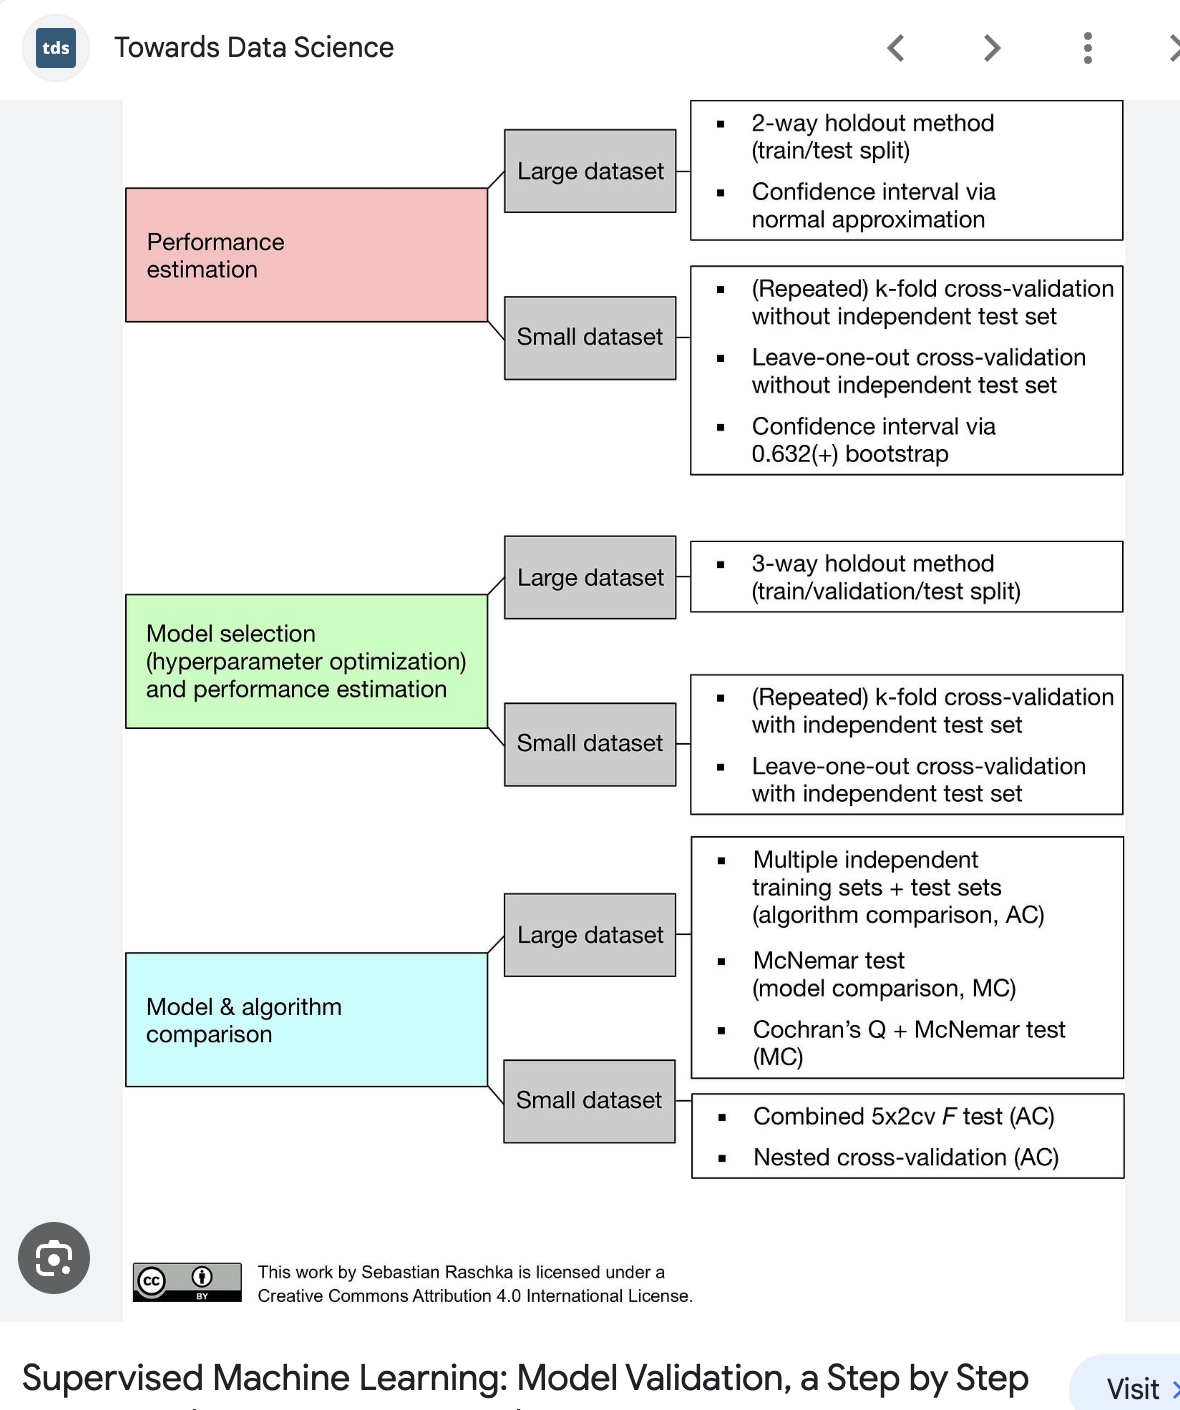

Models needing more training data:

Complex models: Deep learning models, such as deep neural networks (DNNs) or convolutional neural networks (CNNs), often require large amounts of training data to capture the complex patterns present in the data. These models have millions of parameters and can learn intricate relationships between features. More data helps generalize these relationships better.

High-dimensional data: Models trained on high-dimensional data, such as images, audio, or text, tend to require more training data to effectively capture the variability present in the data. With more features, there's a higher risk of overfitting, so more data is needed to generalize well.

Non-linear relationships: Models that need to learn non-linear relationships between features typically require more data to accurately capture these complex patterns. Examples include decision trees, random forests, and support vector machines (SVMs) with non-linear kernels.

Models needing larger validation sets:

Simpler models: Models with fewer parameters, such as linear regression, logistic regression, or simpler decision trees, may not require as much training data to learn the underlying patterns. However, to ensure that these simpler models generalize well, larger validation sets are needed to evaluate their performance effectively.

Low-dimensional data: Models trained on low-dimensional data, such as tabular data with a small number of features, might not require a massive amount of training data to learn the underlying patterns. However, a larger validation set can help provide a more reliable estimate of the model's performance, especially if the dataset is imbalanced or has rare classes.

Stable algorithms: Some algorithms are less prone to overfitting and are more stable with smaller amounts of training data. For example, k-nearest neighbors (KNN) or naïve Bayes classifiers might not need extensive training data compared to deep learning models.

In summary, the choice between needing more training data versus larger validation sets depends on the complexity of the model, the dimensionality of the data, and the stability of the algorithm. More complex models and high-dimensional data often require more training data to generalize well, while simpler models and low-dimensional data may benefit more from larger validation sets to evaluate performance effectively.

## Train-Test Split with Scikit-Learn

You could write your own pandas code to shuffle and split your data, but we'll use the convenient `train_test_split` function from scikit-learn instead. We'll also use the Auto MPG dataset.

In [1]:
import pandas as pd

data = pd.read_csv('auto-mpg.csv')
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


The `train_test_split` function ([documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)) takes in a series of array-like variables, as well as some optional arguments. It returns multiple arrays.

For example, this would be a valid way to use `train_test_split`:

In [2]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data)

In [3]:
train.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
253,25.1,4,140.0,88,2720,15.4,78,1,ford fairmont (man)
211,13.0,8,350.0,145,4055,12.0,76,1,chevy c10
32,19.0,6,232.0,100,2634,13.0,71,1,amc gremlin
112,21.0,6,155.0,107,2472,14.0,73,1,mercury capri v6
370,37.0,4,91.0,68,2025,18.2,82,3,mazda glc custom l


In [4]:
test.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
359,26.6,8,350.0,105,3725,19.0,81,1,oldsmobile cutlass ls
362,28.0,4,112.0,88,2605,19.6,82,1,chevrolet cavalier
248,19.4,8,318.0,140,3735,13.2,78,1,dodge diplomat
344,37.7,4,89.0,62,2050,17.3,81,3,toyota tercel
73,13.0,8,302.0,140,4294,16.0,72,1,ford gran torino (sw)


In this case, the DataFrame `data` was split into two DataFrames called `train` and `test`. `train` has 294 values (75% of the full dataset) and `test` has 98 values (25% of the full dataset). Note the randomized order of the index values on the left.

However you can also pass multiple array-like variables into `train_test_split` at once. For each variable that you pass in, you will get a train and a test copy back out.

Most commonly in this curriculum these are the inputs and outputs:

Inputs

- `X`
- `y`

Outputs

- `X_train`
- `X_test`
- `y_train`
- `y_test`

In [5]:
y = data[['mpg']]
X = data.drop(['mpg', 'car name'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
X_train.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
121,4,121.0,110,2660,14.0,73,2
86,8,350.0,145,3988,13.0,73,1
152,6,250.0,72,3432,21.0,75,1
281,6,232.0,90,3265,18.2,79,1
221,8,318.0,145,4140,13.7,77,1


In [7]:
y_train.head()

,mpg
121,24.0
86,13.0
152,15.0
281,20.2
221,15.5


We can view the lengths of the results like this:

In [8]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

294 98 294 98


However it is not recommended to pass in just the data to be split. This is because the randomization of the split means that you will get different results for `X_train` etc. every time you run the code. **For reproducibility, it is always recommended that you specify a `random_state`**, such as in this example:

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Another optional argument is `test_size`, which makes it possible to choose the size of the test set and the training set instead of using the default 75% train/25% test proportions.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Note that the lengths of the resulting datasets will be different:

In [11]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

313 79 313 79


## Preparing Data for Modeling

When using a train-test split, data preparation should happen _after_ the split. This is to avoid ***data leakage***. The general idea is that the treatment of the test data should be as similar as possible to how genuinely unknown data should be treated. And genuinely unknown data would not have been there at the time of fitting the scikit-learn transformers, just like it would not have been there at the time of fitting the model!

In some cases you will see all of the data being prepared together for expediency, but the best practice is to prepare it separately.

### Log Transformation

In [12]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

# Instantiate a custom transformer for log transformation 
log_transformer = FunctionTransformer(np.log, validate=True)

# Columns to be log transformed 
log_columns = ['displacement', 'horsepower', 'weight']

# New names for columns after transformation
new_log_columns = ['log_disp', 'log_hp', 'log_wt']

# Log transform the training columns and convert them into a DataFrame 
X_train_log = pd.DataFrame(log_transformer.fit_transform(X_train[log_columns]), 
                           columns=new_log_columns, index=X_train.index)

X_train_log.head()

,log_disp,log_hp,log_wt
258,5.416100,4.700480,8.194229
182,4.941642,4.521789,7.852439
172,5.141664,4.574711,8.001020
63,5.762051,5.010635,8.327243
340,4.454347,4.158883,7.536364


In [13]:
# Log transform the test columns and convert them into a DataFrame 
X_test_log = pd.DataFrame(log_transformer.transform(X_test[log_columns]), 
                          columns=new_log_columns, index=X_test.index)

X_test_log.head()

,log_disp,log_hp,log_wt
78,4.564348,4.234107,7.691200
274,4.795791,4.744932,7.935587
246,4.510860,4.094345,7.495542
55,4.510860,4.248495,7.578145
387,4.941642,4.454347,7.933797


### One-Hot Encoding

In [14]:
from sklearn.preprocessing import OneHotEncoder

# Instantiate OneHotEncoder
# Need to use sparse_output=False for sklearn 1.2 or greater
ohe = OneHotEncoder(drop='first', sparse=False)

# Create X_cat which contains only the categorical variables
cat_columns = ['origin']
X_train_cat = X_train.loc[:, cat_columns]

# Transform training set
X_train_ohe = pd.DataFrame(ohe.fit_transform(X_train_cat),
                           index=X_train.index)
X_train_ohe.head()

,0,1
258,0.0,0.0
182,0.0,0.0
172,0.0,0.0
63,0.0,0.0
340,0.0,0.0


In [15]:
# Drop transformed columns
cols_to_drop = log_columns + cat_columns
X_train = X_train.drop(columns=cols_to_drop)

# Combine the three datasets into training
X_train_tr = pd.concat([X_train, X_train_log, X_train_ohe], axis=1)
X_train_tr.head()

,cylinders,acceleration,model year,log_disp,log_hp,log_wt,0,1
258,6,18.7,78,5.416100,4.700480,8.194229,0.0,0.0
182,4,14.9,76,4.941642,4.521789,7.852439,0.0,0.0
172,6,14.5,75,5.141664,4.574711,8.001020,0.0,0.0
63,8,13.5,72,5.762051,5.010635,8.327243,0.0,0.0
340,4,16.4,81,4.454347,4.158883,7.536364,0.0,0.0


In [16]:
# Transform testing set
X_test_ohe = pd.DataFrame(ohe.transform(X_test[cat_columns]),
                          index=X_test.index)
X_test_ohe.head()

,0,1
78,1.0,0.0
274,1.0,0.0
246,0.0,1.0
55,0.0,0.0
387,0.0,0.0


In [17]:
X_test = X_test.drop(columns=cols_to_drop)

# Combine test set
X_test_tr = pd.concat([X_test, X_test_log, X_test_ohe], axis=1)
X_test_tr.head()

,cylinders,acceleration,model year,log_disp,log_hp,log_wt,0,1
78,4,18.0,72,4.564348,4.234107,7.691200,1.0,0.0
274,4,15.7,78,4.795791,4.744932,7.935587,1.0,0.0
246,4,16.4,78,4.510860,4.094345,7.495542,0.0,1.0
55,4,20.5,71,4.510860,4.248495,7.578145,0.0,0.0
387,4,15.6,82,4.941642,4.454347,7.933797,0.0,0.0


## Building, Evaluating, and Validating a Model

Great, now that you have preprocessed all the columns, you can fit a linear regression model: 

In [18]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train_tr, y_train)

y_hat_train = linreg.predict(X_train_tr)
y_hat_test = linreg.predict(X_test_tr)

Look at the residuals and calculate the MSE for training and test sets:  

In [19]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [20]:
mse_train = np.sum((y_train - y_hat_train)**2)/len(y_train)
mse_test = np.sum((y_test - y_hat_test)**2)/len(y_test)
print('Train Mean Squared Error:', mse_train)
print('Test Mean Squared Error:', mse_test)

Train Mean Squared Error: mpg    9.091819
dtype: float64
Test Mean Squared Error: mpg    10.010059
dtype: float64


You can also do this directly using sklearn's `mean_squared_error()` function: 

In [21]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)

Train Mean Squared Error: 9.091818811315937
Test Mean Squared Error: 10.01005948400949


Great, there does not seem to be a big difference between the train and test MSE!

In other words, our evaluation process has indicated that we are **not** overfitting. In fact, we may be _underfitting_ because linear regression is not a very complex model.

## Overfitting with a Different Model

Just for the sake of example, here is a model that is overfit to the data. Don't worry about the model algorithm being shown! Instead, just look at the MSE for the train vs. test set, using the same preprocessed data:

In [22]:
from sklearn.tree import DecisionTreeRegressor

other_model = DecisionTreeRegressor(random_state=42)
other_model.fit(X_train_tr, y_train)

other_train_mse = mean_squared_error(y_train, other_model.predict(X_train_tr))
other_test_mse = mean_squared_error(y_test, other_model.predict(X_test_tr))
print('Train Mean Squared Error:', other_train_mse)
print('Test Mean Squared Error:', other_test_mse)

Train Mean Squared Error: 0.0
Test Mean Squared Error: 11.403164556962025


This model initially seems great...0 MSE for the training data! But then you see that it is performing worse than our linear regression model on the test data. This model **is** overfitting.

## Additional Resources

[This blog post](https://towardsdatascience.com/linear-regression-in-python-9a1f5f000606) shows a walkthrough of the key steps for model validation with train-test split and scikit-learn.

my links: https://youtu.be/3NeRWVul5E0?si=EaEs7-gdexF3k4gC



## Summary 

In this lesson, you learned the importance of the train-test split approach and used one of the most popular metrics for evaluating regression models, (R)MSE. You also saw how to use the `train_test_split` function from `sklearn` to split your data into training and test sets, and then evaluated whether models were overfitting using metrics on those training and test sets.